In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates

# --- Parametre ---
year = 2022
file_path = "/Users/eirikkloosterman/Documents/bachelor/Bachelor/data/raw/biostat-total-omr.csv"

# --- Les inn og aggreger på nytt som før ---
df = pd.read_csv(file_path, sep=";", decimal=".", na_values=["(null)"])
df = df[df["ARTSID"] == "LAKS"].copy()

grp = (
    df.groupby(["PO_KODE","ÅR","MÅNED_KODE"], as_index=False)
      .agg(
        BEHFISK_STK = ("BEHFISK_STK","sum"),
        DØDFISK_STK = ("DØDFISK_STK","sum"),
      )
)

grp = grp.query("BEHFISK_STK > 0")
grp["pct_dead"] = 100*grp["DØDFISK_STK"]/grp["BEHFISK_STK"]

# --- Regn ut mean, std, min, max over alle år ---
monthly = (
    grp
      .groupby(["PO_KODE","MÅNED_KODE"], as_index=False)
      .agg(
        mean_pct=("pct_dead","mean"),
        std_pct =("pct_dead","std"),
        min_pct =("pct_dead","min"),
        max_pct =("pct_dead","max"),
      )
)

grp 

import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/eirikkloosterman/Documents/bachelor/Bachelor/data/raw/biostat-total-omr.csv"

# 1) Les inn CSV med semikolon
df = pd.read_csv(file_path, sep=";", decimal=".", na_values=["(null)"])

# 2) Filtrer til LAKS
df_laks = df[df["ARTSID"] == "LAKS"].copy()

# 3) Gruppér på (PO_KODE, ÅR, MÅNED_KODE) og summer BEHFISK_STK og DØDFISK_STK
group_annual = (
    df_laks
    .groupby(["PO_KODE", "ÅR", "MÅNED_KODE"], dropna=False, as_index=False)
    .agg({"BEHFISK_STK": "sum", "DØDFISK_STK": "sum"})
)

# 4) Beregn prosent dødfisk for hver (PO, ÅR, MÅNED)
# Fjern rader med 0 i beholdning før beregning av prosent
group_annual = group_annual[group_annual["BEHFISK_STK"] > 0].copy()

# Beregn prosent dødfisk
group_annual["pct_dead"] = (group_annual["DØDFISK_STK"] / group_annual["BEHFISK_STK"]) * 100

group_annual["pct_dead"] = (group_annual["DØDFISK_STK"] / group_annual["BEHFISK_STK"]) * 100

# 5) Gruppér deretter på (PO_KODE, MÅNED_KODE) for å finne gjennomsnittlig% og std
group_monthly = (
    group_annual
    .groupby(["PO_KODE", "MÅNED_KODE"], dropna=False, as_index=False)["pct_dead"]
    .agg(["mean", "std"])
    .reset_index()
)

#print dataframe
data = group_monthly
data = data.rename(columns={"mean": "mean_pct", "std": "std_pct"})
data  = grp.merge(monthly, on=["PO_KODE","MÅNED_KODE"], how="left")



,ÅR,MÅNED_KODE,MÅNED,PO_KODE,PO_NAVN,ARTSID,UTSETTSÅR,BEHFISK_STK,BIOMASSE_KG,UTSETT_SMOLT_STK,...,FORFORBRUK_KG,UTTAK_STK,UTTAK_KG,UTTAK_SLØYD_KG,UTTAK_HODEKAPPET_KG,UTTAK_RUNDVEKT_KG,DØDFISK_STK,UTKAST_STK,RØMMING_STK,ANDRE_STK
0,2017,10,OKTOBER,NaN,NaN,LAKS,2014,750,9.731487e+03,0,...,723,0,0.000000e+00,0,0,0,29,0,0,0
1,2017,10,OKTOBER,NaN,NaN,LAKS,2015,500359,1.743954e+06,0,...,235639,0,0.000000e+00,0,0,0,3049,0,0,914
2,2017,10,OKTOBER,NaN,NaN,LAKS,2016,7177069,2.696831e+07,0,...,5211812,965106,4.636157e+06,4119037,0,2240,169899,8786,0,23758
3,2017,10,OKTOBER,NaN,NaN,LAKS,2017,11325736,8.634561e+06,2218891,...,2629340,2902,6.300000e+03,0,0,6300,176571,4252,0,196
4,2017,10,OKTOBER,NaN,NaN,REGNBUEØRRET,2015,16141,8.895175e+04,0,...,4294,0,0.000000e+00,0,0,0,103,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,2025,2,FEBRUAR,11.0,Kvaløy til Loppa,LAKS,2024,22642121,3.813054e+07,0,...,4530064,357970,1.401453e+06,1245736,0,0,600146,7155,0,34223
4364,2025,2,FEBRUAR,12.0,Vest-Finnmark,LAKS,2023,6849675,2.620946e+07,0,...,2770211,2389143,1.101510e+07,9791203,0,0,92540,32959,0,-28209
4365,2025,2,FEBRUAR,12.0,Vest-Finnmark,LAKS,2024,30436567,3.750017e+07,0,...,4538932,0,0.000000e+00,0,0,0,334280,0,0,47629
4366,2025,2,FEBRUAR,13.0,Øst-Finnmark,LAKS,2023,633482,3.097647e+06,0,...,293710,71676,3.841796e+05,341493,0,0,3239,1447,0,659


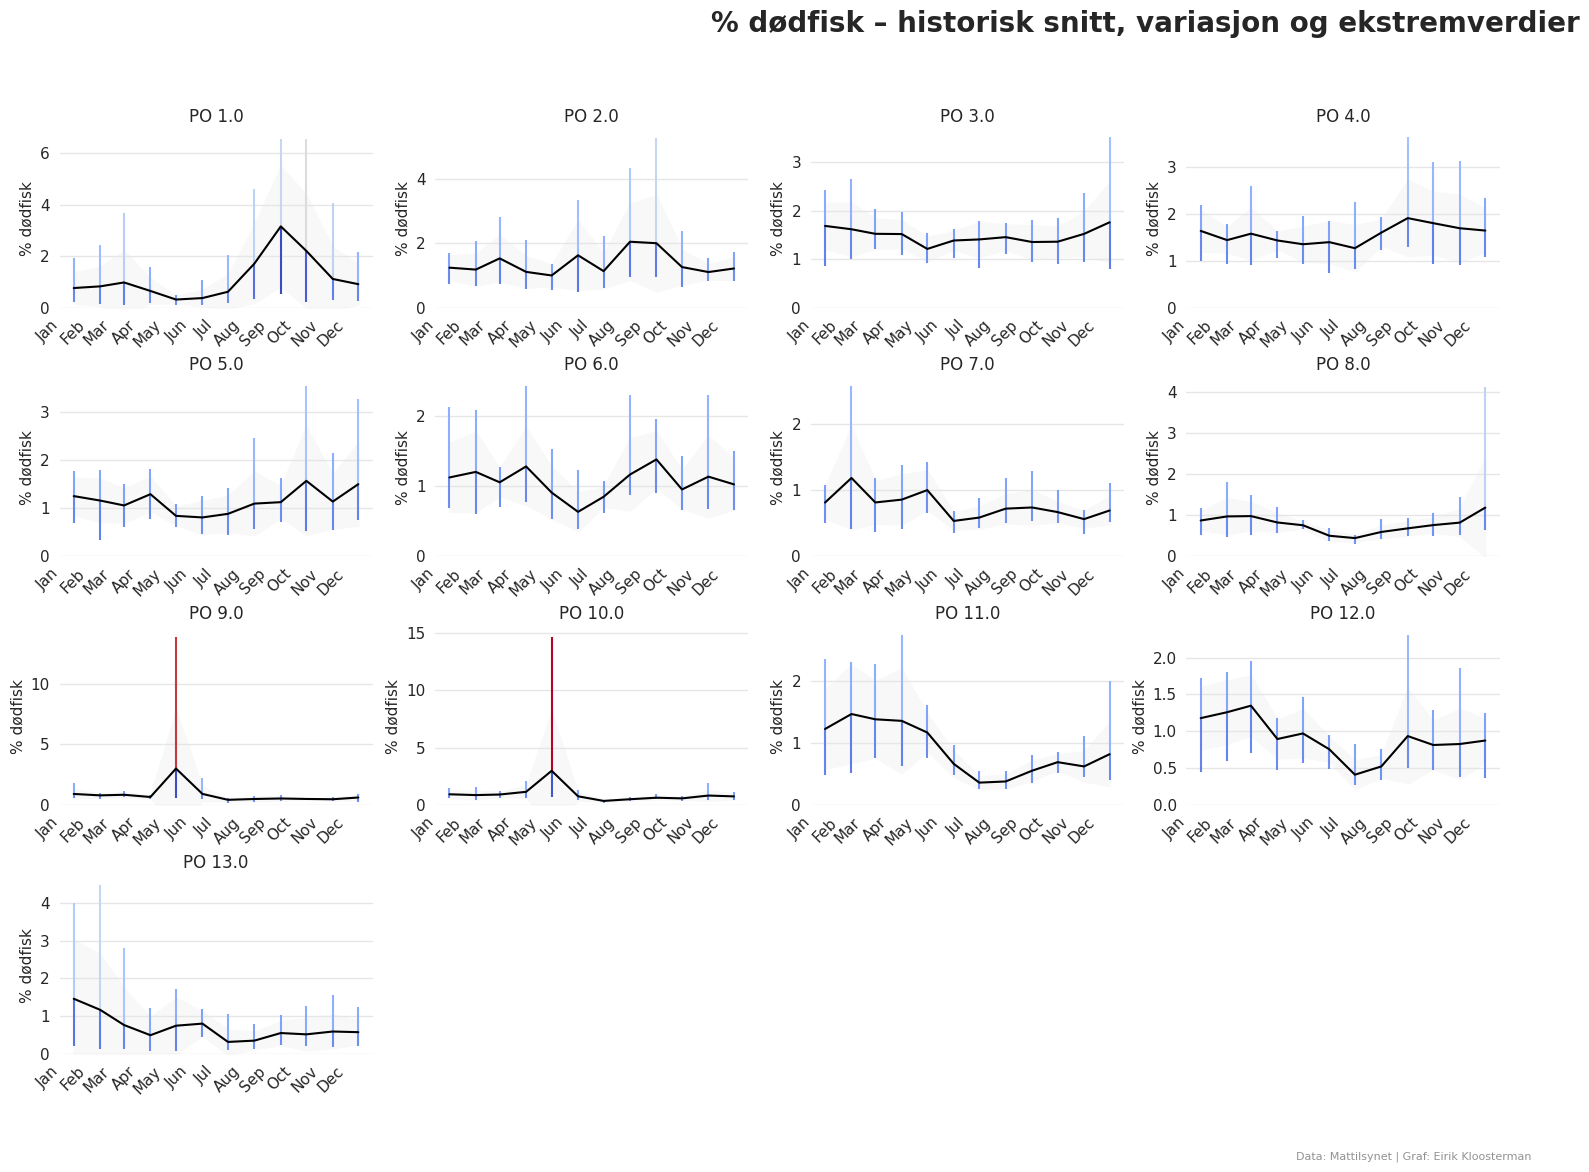

In [ ]:

data = monthly.copy()


# --- Lage fiktiv dato midt i hver mnd for x-akse ---
data["date"] = pd.to_datetime({
    "year":  year,
    "month": data["MÅNED_KODE"],
    "day":   15
})

# --- Plot-stil (copy/paste fra klima-koden din) ---
sns.set_style("white")
plt.rcParams["figure.dpi"]      = 100
mpl.rcParams["font.family"]     = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Lato","DejaVu Sans","Arial"]
mpl.rcParams["axes.labelsize"]  = 11
mpl.rcParams["xtick.labelsize"] = 11
mpl.rcParams["ytick.labelsize"] = 11

# Colormap for vlines (valgfritt)
diff_min = data["min_pct"] - data["mean_pct"]
diff_max = data["max_pct"] - data["mean_pct"]
diff_vals = np.concatenate([diff_min, diff_max])
norm = mpl.colors.Normalize(vmin=diff_vals.min(), vmax=diff_vals.max())


# --- Tegn subplots uten sharex, ett pr PO ---
po_codes = data["PO_KODE"].unique()
cols = 4
rows = int(np.ceil(len(po_codes)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for ax, po in zip(axes, po_codes):
    df_po = data[data["PO_KODE"] == po]
    
    # Fjerne rammer + grid
    for s in ax.spines.values(): s.set_visible(False)
    ax.grid(axis="y", color="0.9", linestyle="-", linewidth=1)
    
    # 1) Grått område = mean ± std
    ax.fill_between(
        df_po["date"],
        df_po["mean_pct"] - df_po["std_pct"],
        df_po["mean_pct"] + df_po["std_pct"],
        color="#f8f8f8",
        zorder=0
    )
    
    # 2) Svart linje for mean
    ax.plot(
        df_po["date"],
        df_po["mean_pct"],
        color="black",
        zorder=10
    )
    
    # 3) Vertikale linjer til ekstremverdier
    for _, r in df_po.iterrows():
        # opp mot max
        ax.vlines(
            r["date"], r["mean_pct"], r["max_pct"],
            color=cmap(norm(r["max_pct"]-r["mean_pct"])),
            linewidth=1.5,
            zorder=5
        )
        # ned mot min
        ax.vlines(
            r["date"], r["mean_pct"], r["min_pct"],
            color=cmap(norm(r["min_pct"]-r["mean_pct"])),
            linewidth=1.5,
            zorder=5
        )
    
    # Månedsetiketter
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45); lbl.set_horizontalalignment("right")
    
    ax.set_ylim(bottom=0)
    ax.set_title(f"PO {po}", fontsize=12)
    ax.set_ylabel("% dødfisk")

# Fjern tomme plott
for ax in axes[len(po_codes):]:
    fig.delaxes(ax)

# Hovedtittel og marginjustering
plt.suptitle(
    f"% dødfisk – historisk snitt, variasjon og ekstremverdier",
    fontsize=20,
    fontweight="bold",
    x=1,
    ha="right"
)
plt.subplots_adjust(left=0.05, right=0.95, top=0.88, hspace=0.4)

# Footer
fig.text(
    0.97, 0.02,
    "Data: Mattilsynet | Graf: Eirik Kloosterman",
    ha="right",
    va="bottom",
    fontsize=8,
    alpha=0.5
)

plt.show()
